# Tugas Kecil
## Eksplorasi library Decision Tree Learning pada Jupyter Notebook
### Play Tennis
<p>Anggota : <br>
 Jose Galbraith Hasintongan (13519022) <br>
 Muhammad Fahkry Malta (13519032) </p>

<p>Import libraries yang diperlukan</p>

In [33]:
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics

<p>Import Play Tennis Dataset</p>

In [34]:
play_tennis = pd.read_csv('play_tennis.csv')

<p>Buat dataframe untuk dataset</p>

In [35]:
df_play_tennis = pd.DataFrame(play_tennis)

In [36]:
df_play_tennis.head()

,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [37]:
df_play_tennis.columns

Index(['Day', 'Outlook', 'Temperature', 'Humidity', 'Wind', 'Play'], dtype='object')

<p>Split Data</p>

In [38]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_play_tennis['Outlook'] = lb.fit_transform(df_play_tennis['Outlook']) 
df_play_tennis['Temperature'] = lb.fit_transform(df_play_tennis['Temperature'] ) 
df_play_tennis['Humidity'] = lb.fit_transform(df_play_tennis['Humidity'] ) 
df_play_tennis['Wind'] = lb.fit_transform(df_play_tennis['Wind'] )   
df_play_tennis['Play'] = lb.fit_transform(df_play_tennis['Play'] ) 
X = df_play_tennis.iloc[:,1:5] 
y = df_play_tennis.iloc[:,5]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0, test_size=0.2)

Decision Tree

[Text(111.60000000000001, 199.32, 'X[0] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(55.800000000000004, 163.07999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 1.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(111.60000000000001, 126.83999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(167.4, 90.6, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(111.60000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 54.359999999999985, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

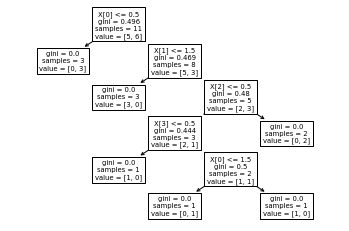

In [39]:
from sklearn import tree
from sklearn.tree import export_text
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train,y_train)
tree.plot_tree(clf1)

In [40]:
play_tennis_columns = df_play_tennis.columns[1:5]
play_tennis_columns_ = []
for i in play_tennis_columns:
    play_tennis_columns_.append(i)

In [41]:
df_play_tennis.columns[1:5]

Index(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype='object')

In [42]:
#Export Text
r1 = export_text(clf1, feature_names=play_tennis_columns_)
print(r1)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Temperature <= 1.50
|   |   |--- class: 0
|   |--- Temperature >  1.50
|   |   |--- Humidity <= 0.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- Outlook <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Outlook >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- Humidity >  0.50
|   |   |   |--- class: 1



In [43]:
#Prediction
print("Accuracy score : ", sklearn.metrics.accuracy_score(y_test, clf1.predict(X_test)))
print("F1 Score : ", sklearn.metrics.f1_score(y_test, clf1.predict(X_test),average='weighted'))

Accuracy score :  0.3333333333333333
F1 Score :  0.5


Id3 Estimator

In [44]:
%pip install decision-tree-id3

Note: you may need to restart the kernel to use updated packages.


In [45]:
%conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [46]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.datasets import load_breast_cancer
from id3 import Id3Estimator
from id3 import export_graphviz

estimator = Id3Estimator()
estimator = estimator.fit(X_train,y_train)
tree = export_graphviz(estimator.tree_, 'play-tennis.dot', df_play_tennis.columns)

In [47]:
!dot -Tpdf play-tennis.dot -o play-tennis.pdf

In [48]:
#Prediction
print("Accuracy score : ", sklearn.metrics.accuracy_score(y_test, estimator.predict(X_test)))
print("F1 Score : ", sklearn.metrics.f1_score(y_test, estimator.predict(X_test),average='weighted'))

Accuracy score :  0.3333333333333333
F1 Score :  0.5


<p>K Means</p>

In [49]:
from sklearn.cluster import KMeans

x1 = df_play_tennis.iloc[:,1:5]
y1 = df_play_tennis.iloc[:,5]
X_train1, X_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(x1, y1, random_state=0)
kmeans = KMeans(n_clusters=2, random_state=0).fit(x1)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.66666667 0.33333333 0.83333333 0.66666667]
 [1.375      1.75       0.25       0.5       ]]


In [50]:
print("Accuracy score: " , sklearn.metrics.accuracy_score(y_test1, kmeans.predict(X_test1)))
print("F1 Score : " , sklearn.metrics.f1_score(y_test1, kmeans.predict(X_test1),average='weighted'))

Accuracy score:  0.25
F1 Score :  0.4


Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)
print("Accuracy score : " , sklearn.metrics.accuracy_score(y_test, model.predict(X_test)))
print("F1 Score : " , sklearn.metrics.f1_score(y_test, model.predict(X_test),average='weighted'))

Accuracy score :  0.3333333333333333
F1 Score :  0.5


<p>Neural Network</p>

In [52]:
from sklearn.neural_network import MLPClassifier
clf4 = MLPClassifier(random_state=1, max_iter=2000).fit(X_train, y_train)
print("Accuracy score : " , sklearn.metrics.accuracy_score(y_test, clf4.predict(X_test)))
print("F1 Score : " , sklearn.metrics.f1_score(y_test, clf4.predict(X_test),average='weighted'))

Accuracy score :  0.6666666666666666
F1 Score :  0.8000000000000002


SVM

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)
print("Accuracy score : " , sklearn.metrics.accuracy_score(y_test, model2.predict(X_test)))
print("F1 Score : " , sklearn.metrics.f1_score(y_test, model2.predict(X_test),average='weighted'))

Accuracy score :  0.3333333333333333
F1 Score :  0.5


### Analysis
<p>Dengan menggunakan dataset Play Tennis, algoritma Neural Network menempati posisi terbaik dalam skor akurasi dan F1. Jika diurutkan dari yang terbaik dari segi skor akurasi dan skor F1 maka urutannya adalah Neural Network, Decision Tree, ID3 Estimator, Logistic Regression, dan SVM menempati posisi posisi yang setara, serta KMeans.</p>
<br>
<p>Neural Network menjadi yang terbaik mungkin dikarenakan NN dengan mudah mengenali pattern dari hubungan antardata</p>
<p>Decision Tree, ID3 Estimator, Logistic Regression, dan SVM menempati posisi terbaik setelahnya mungkin dikarenakan dataset yang kurang besar sehingga akurasi tidak begitu besar sehingga data training sangat sedikit tetapi output yang hanya merupakan Binary (True or False) memudahkan algoritma untuk membuat keputusan.</p>
<p>KMeans tidak cocok digunakan dalam dataset ini mungkin dikarenakan dataset memiliki outliers dan KMeans sangat sensitif dengan outliers</p>